In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 设置风格和字体
sns.set(style="darkgrid",rc={"font.sans-serif":"SimHei"})

d:\python3.6.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '温度走势')

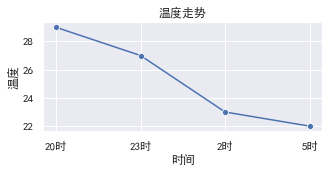

In [2]:
# 作业1：绘制折线图参考答案
# 北京某天的温度
bj_temps = [29,27,23,22]
bj_hours = ["20时","23时","2时","5时"]
plt.figure(figsize=(5,2))
axes = sns.lineplot(range(0,4),bj_temps,marker="o")
axes.set_xticks(range(0,4))
axes.set_xticklabels(bj_hours)
axes.set_xlabel("时间")
axes.set_ylabel("温度")
axes.set_title("温度走势")

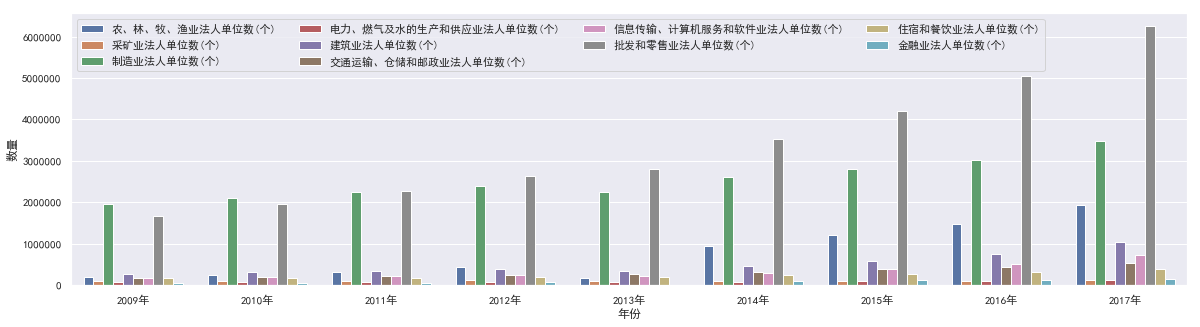

In [3]:
# 作业2：绘制条形图参考答案
legals = pd.read_csv("法人人数年度数据.csv",encoding='GB18030')
temp_legals = legals[1:11]

# 清理数据
new_legals = pd.DataFrame()
for index in temp_legals.index:
    row_values =temp_legals.loc[index]
    for x in range(2009,2018):
        year = "%d年"%x
        series = pd.Series({"指标":row_values['指标'],'年份':year,"数量":row_values[year]})
        new_legals = pd.concat([new_legals,series.to_frame().T])
new_legals.reset_index(drop=True,inplace=True)

# 开始绘图
plt.figure(figsize=(20,5))
sns.barplot(x="年份",y="数量",hue="指标",data=new_legals)
plt.legend(ncol=4)

d:\python3.6.6\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\python3.6.6\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\python3.6.6\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\python3.6.6\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\python3.6.6\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the si

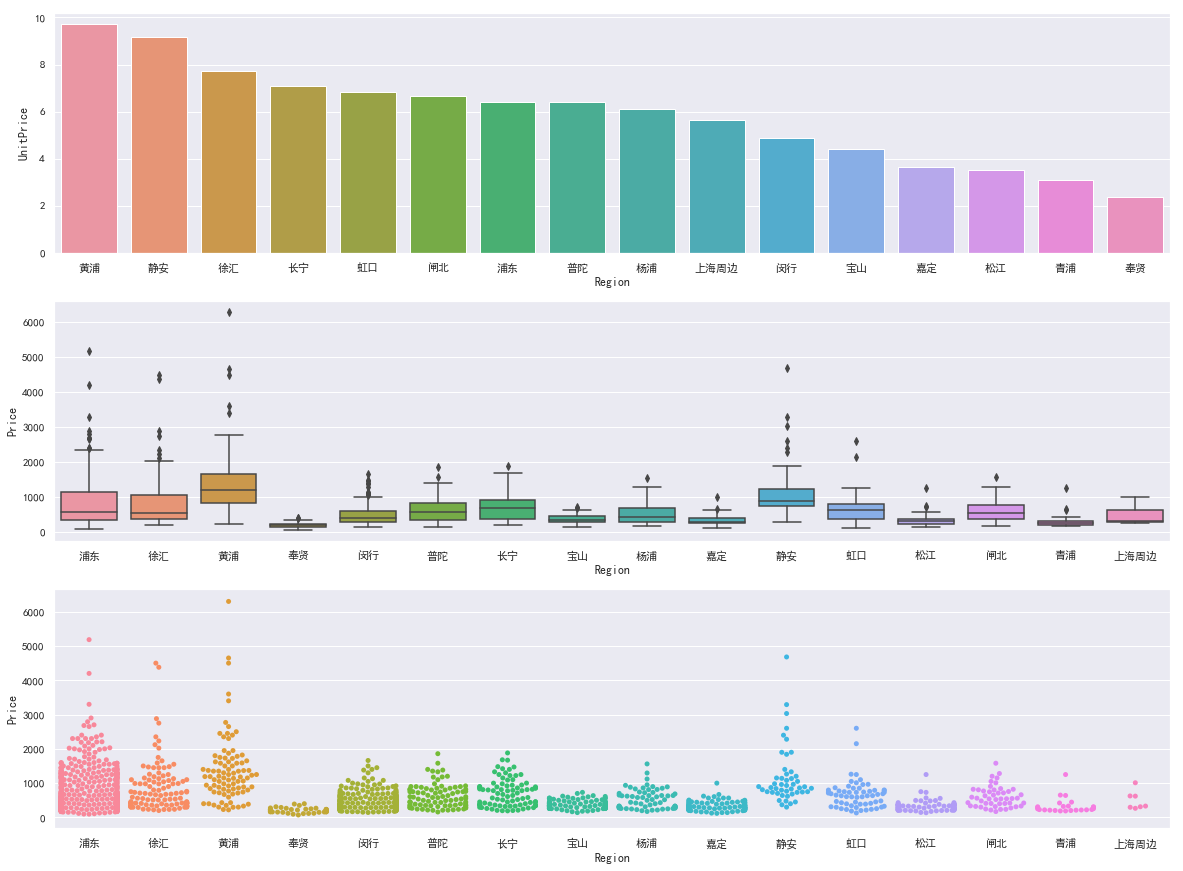

In [4]:
# 作业3：绘制条形图，箱线图，swarm图参考答案
lianjia = pd.read_csv("lianjia.csv",encoding='utf-8')
lianjia['UnitPrice'] = lianjia['Price']/lianjia['Size']
house_mean = lianjia.groupby('Region')['UnitPrice'].mean().sort_values(ascending=False).to_frame().reset_index()
fig,axes_arr = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x="Region",y="UnitPrice",data=house_mean,ax=axes_arr[0])
sns.boxplot(x="Region",y="Price",data=lianjia,ax=axes_arr[1])
sns.swarmplot(x="Region",y="Price",data=lianjia,ax=axes_arr[2])

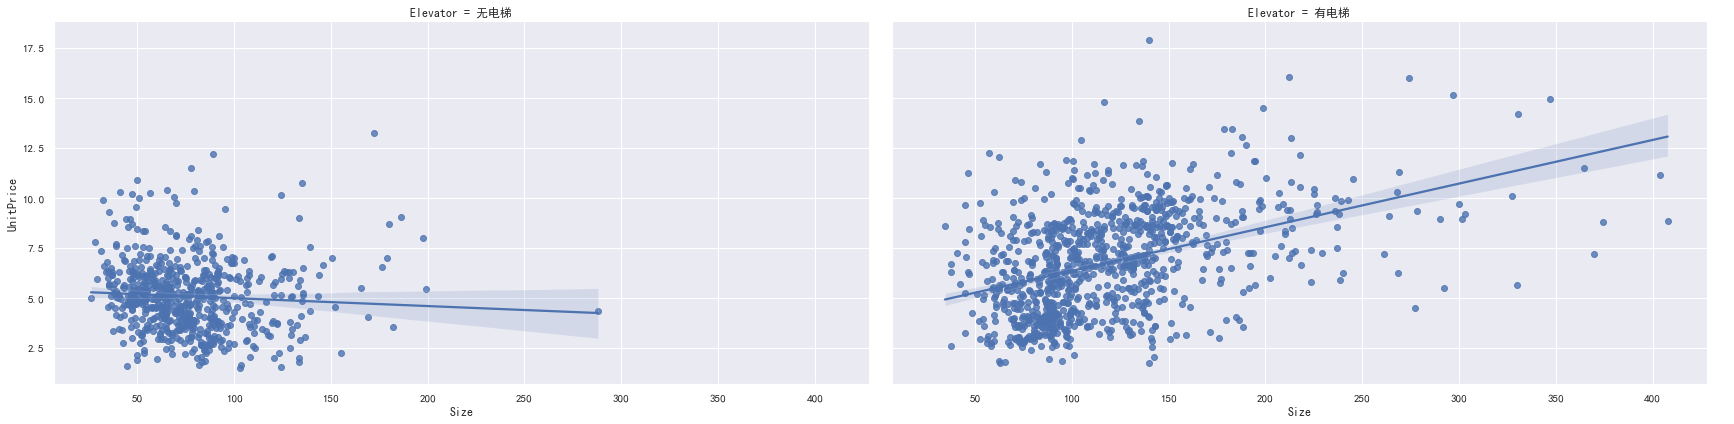

In [5]:
# 作业4：使用FacetGrid绘制尺寸与单价的关系，并且区分有无电梯
fg = sns.FacetGrid(lianjia,col="Elevator",height=6,aspect=2)
fg.map(sns.regplot,"Size","UnitPrice")
fg.add_legend()